# Exploratory Data Analysis for Hepatitits Dataset

# Step1: Importing Necessary packages

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step2: Read the dataset using pandas

In [11]:
dataset=pd.read_csv('hepatitits.csv')
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


# Step3: Check for Nullvalues

In [5]:
dataset.isnull().any().any()

True

In [7]:
dataset.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
age                155 non-null int64
sex                155 non-null object
steroid            154 non-null object
antivirals         155 non-null bool
fatigue            154 non-null object
malaise            154 non-null object
anorexia           154 non-null object
liver_big          145 non-null object
liver_firm         144 non-null object
spleen_palpable    150 non-null object
spiders            150 non-null object
ascites            150 non-null object
varices            150 non-null object
bilirubin          149 non-null float64
alk_phosphate      126 non-null float64
sgot               151 non-null float64
albumin            139 non-null float64
protime            88 non-null float64
histology          155 non-null bool
class              155 non-null object
dtypes: bool(2), float64(5), int64(1), object(12)
memory usage: 22.2+ KB


# Step4: Describe Dataset

In [9]:
dataset.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


# Step5: Perform Data Vishualization:

In [14]:
dataset_num=dataset.select_dtypes(include=['float64','int64'])
dataset_num.head()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.0,85.0,18.0,4.0,NaN
1,50,0.9,135.0,42.0,3.5,NaN
2,78,0.7,96.0,32.0,4.0,NaN
3,31,0.7,46.0,52.0,4.0,80.0
4,34,1.0,NaN,200.0,4.0,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019498AC4CC0>,
      dtype=object)

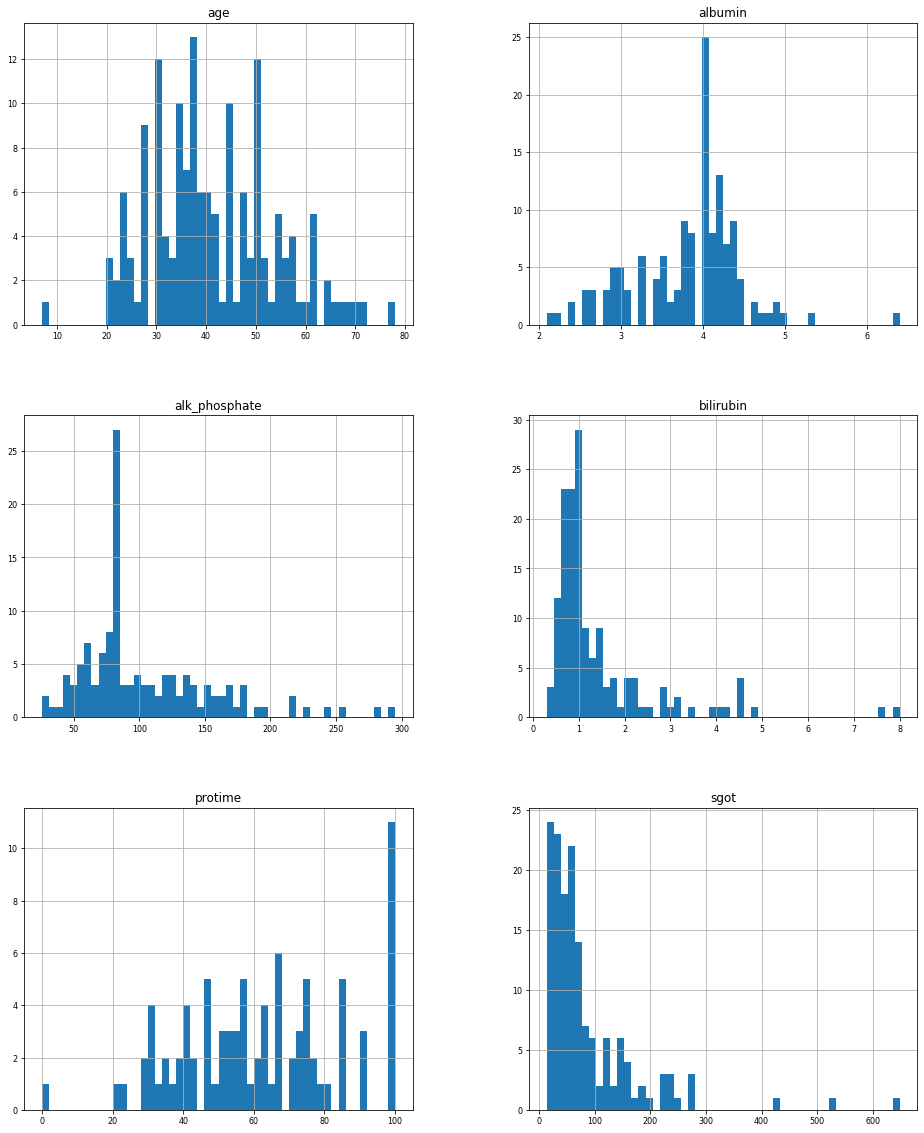

In [15]:
dataset_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8) 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


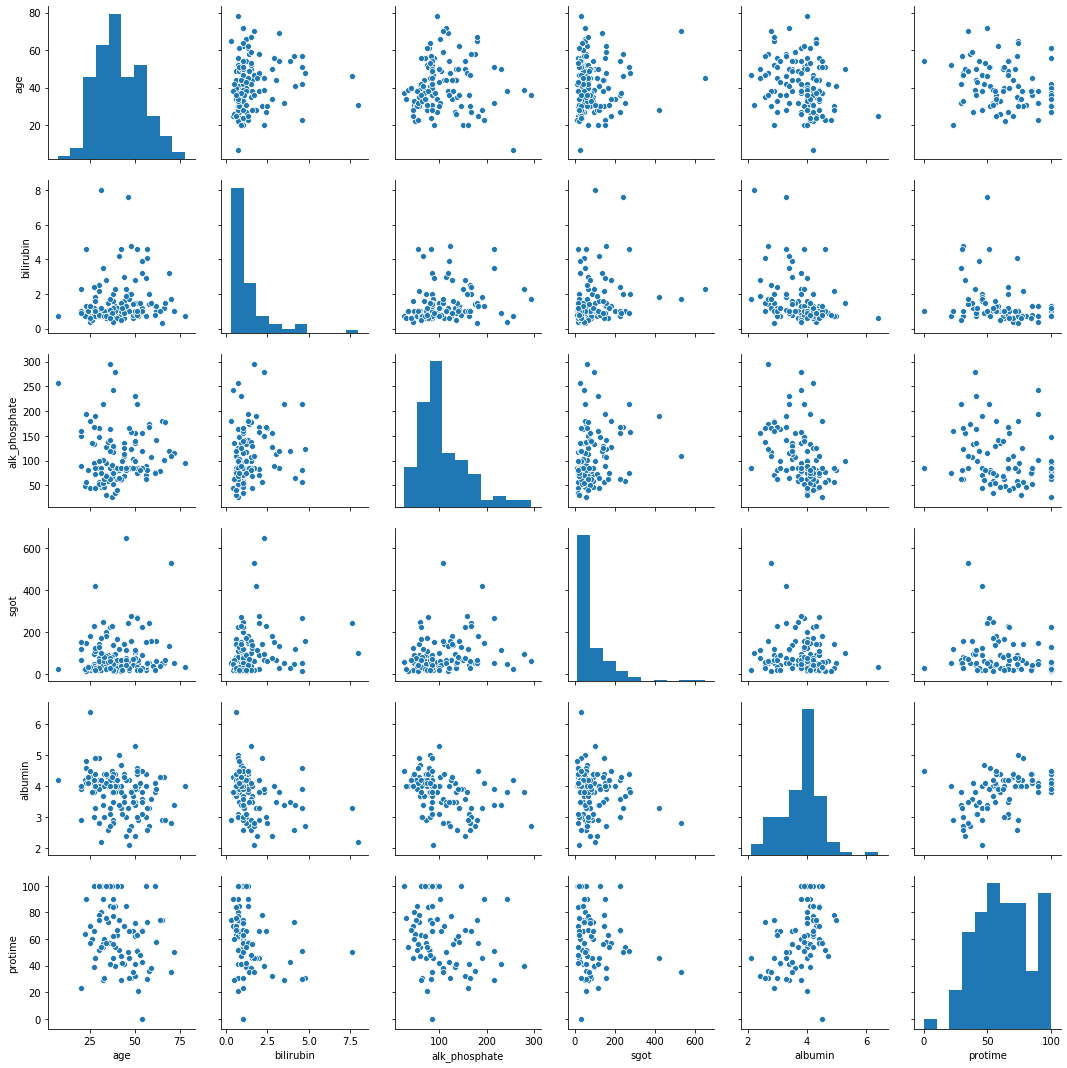

In [17]:
sns.pairplot(dataset_num)

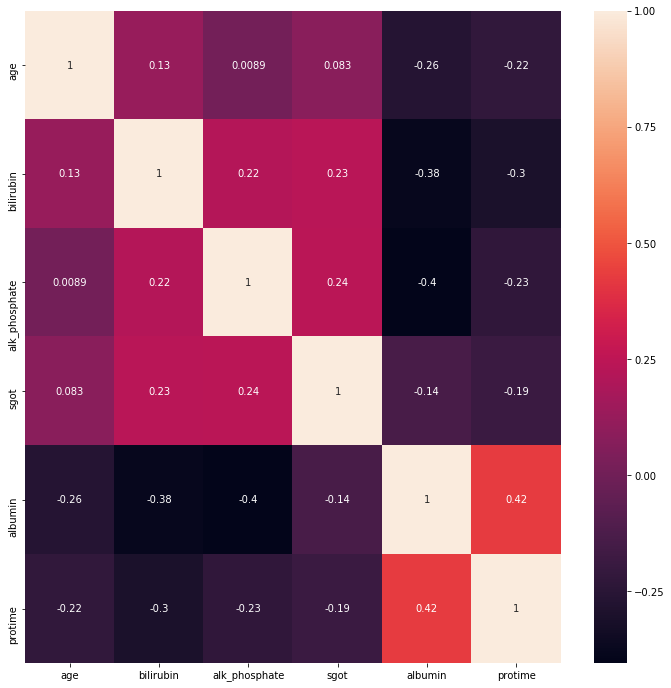

In [18]:
corr_matrix=dataset_num.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Step6: Label encoding 

In [19]:
dataset['sex'].value_counts()

female    139
male       16
Name: sex, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [22]:
dataset['sex'] = lb.fit_transform(dataset['sex'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [23]:
dataset['steroid'] = lb.fit_transform(dataset['steroid'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,0,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,1,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,2,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,1,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [25]:
dataset['antivirals'] = lb.fit_transform(dataset['antivirals'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,0,0,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,1,0,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,2,1,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,1,0,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [26]:
dataset['fatigue'] = lb.fit_transform(dataset['fatigue'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,0,0,1,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,1,0,1,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,2,1,0,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,1,0,0,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [27]:
dataset['malaise'] = lb.fit_transform(dataset['malaise'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,0,0,1,0,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,1,0,1,0,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,2,1,0,0,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,1,0,0,0,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [28]:
dataset['anorexia'] = lb.fit_transform(dataset['anorexia'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,0,0,1,0,0,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,1,0,1,0,0,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,2,1,0,0,0,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,1,0,0,0,0,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [29]:
dataset['liver_big'] = lb.fit_transform(dataset['liver_big'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,0,0,1,0,0,0,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,1,0,1,0,0,1,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,2,1,0,0,0,1,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,1,0,0,0,0,1,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [30]:
dataset['liver_firm'] = lb.fit_transform(dataset['liver_firm'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,0,0,1,0,0,0,0,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,1,0,1,0,0,1,0,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,2,1,0,0,0,1,0,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,1,0,0,0,0,1,0,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [31]:
dataset['spleen_palpable'] = lb.fit_transform(dataset['spleen_palpable'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,0,0,1,0,0,0,0,0,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,1,0,1,0,0,1,0,0,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,2,1,0,0,0,1,0,0,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,1,0,0,0,0,1,0,0,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [32]:
dataset['spiders'] = lb.fit_transform(dataset['spiders'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,0,0,1,0,0,0,0,0,0,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,1,0,1,0,0,1,0,0,0,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,2,1,0,0,0,1,0,0,0,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,1,0,0,0,0,1,0,0,0,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [33]:
dataset['ascites'] = lb.fit_transform(dataset['ascites'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,0,0,1,0,0,0,0,0,0,0,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,1,0,1,0,0,1,0,0,0,0,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,2,1,0,0,0,1,0,0,0,0,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,1,0,0,0,0,1,0,0,0,0,False,1.0,NaN,200.0,4.0,NaN,False,live


In [34]:
dataset['varices'] = lb.fit_transform(dataset['varices'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,2,1,0,0,0,1,0,0,0,0,0,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,NaN,200.0,4.0,NaN,False,live


In [35]:
dataset['histology'] = lb.fit_transform(dataset['histology'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,NaN,0,live
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,NaN,0,live
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,NaN,0,live
3,31,0,2,1,0,0,0,1,0,0,0,0,0,0.7,46.0,52.0,4.0,80.0,0,live
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,NaN,200.0,4.0,NaN,0,live


In [36]:
dataset['class'] = lb.fit_transform(dataset['class'])
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,NaN,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,NaN,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,NaN,0,1
3,31,0,2,1,0,0,0,1,0,0,0,0,0,0.7,46.0,52.0,4.0,80.0,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,NaN,200.0,4.0,NaN,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000194AD729E10>,
      dtype=object)

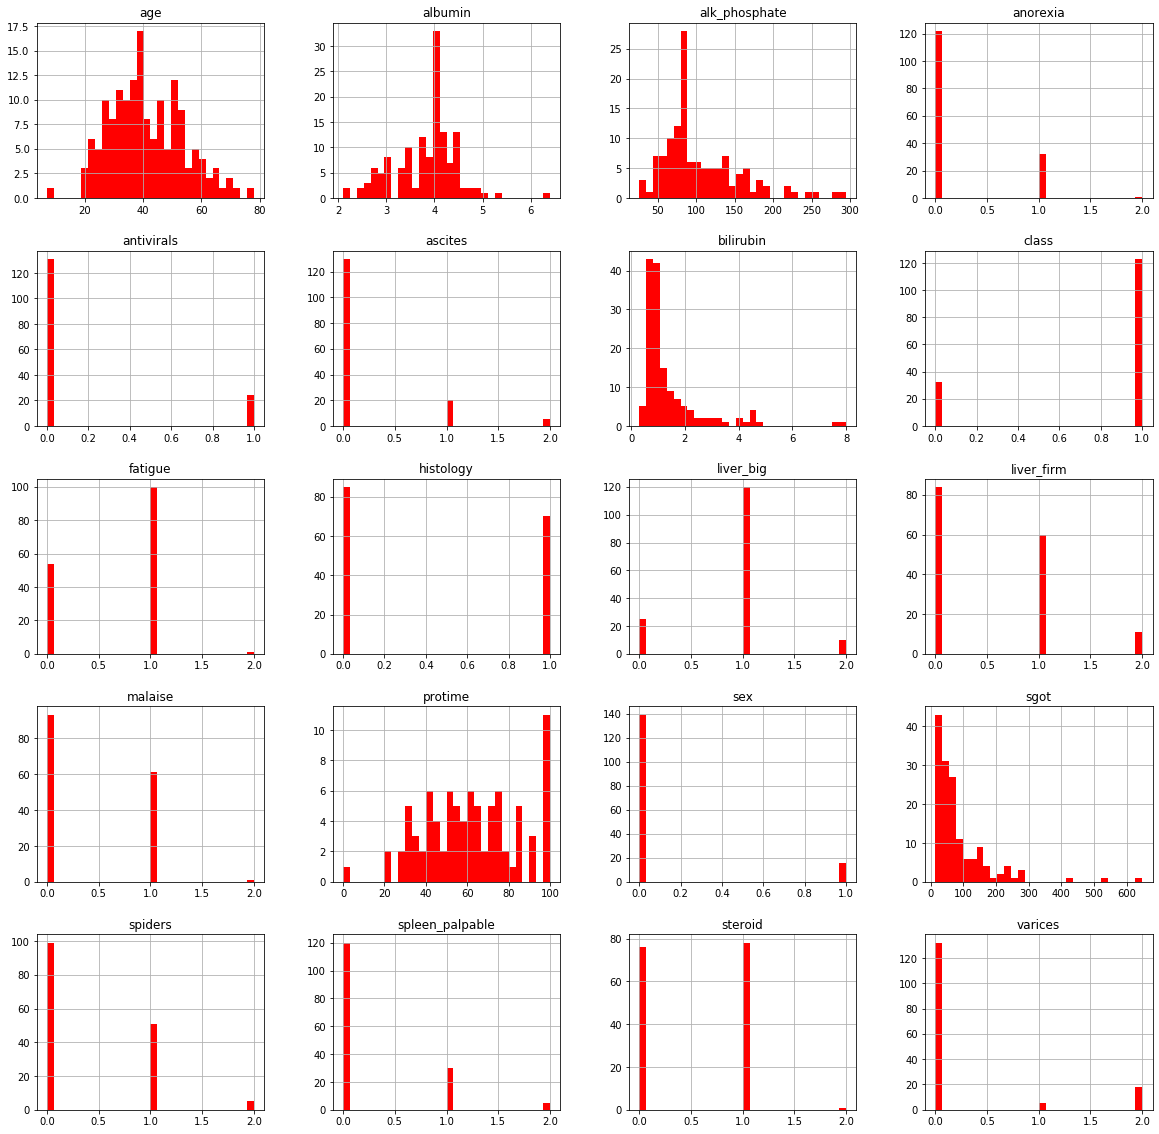

In [37]:
dataset.hist(bins=30,figsize=(20,20),color='r')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


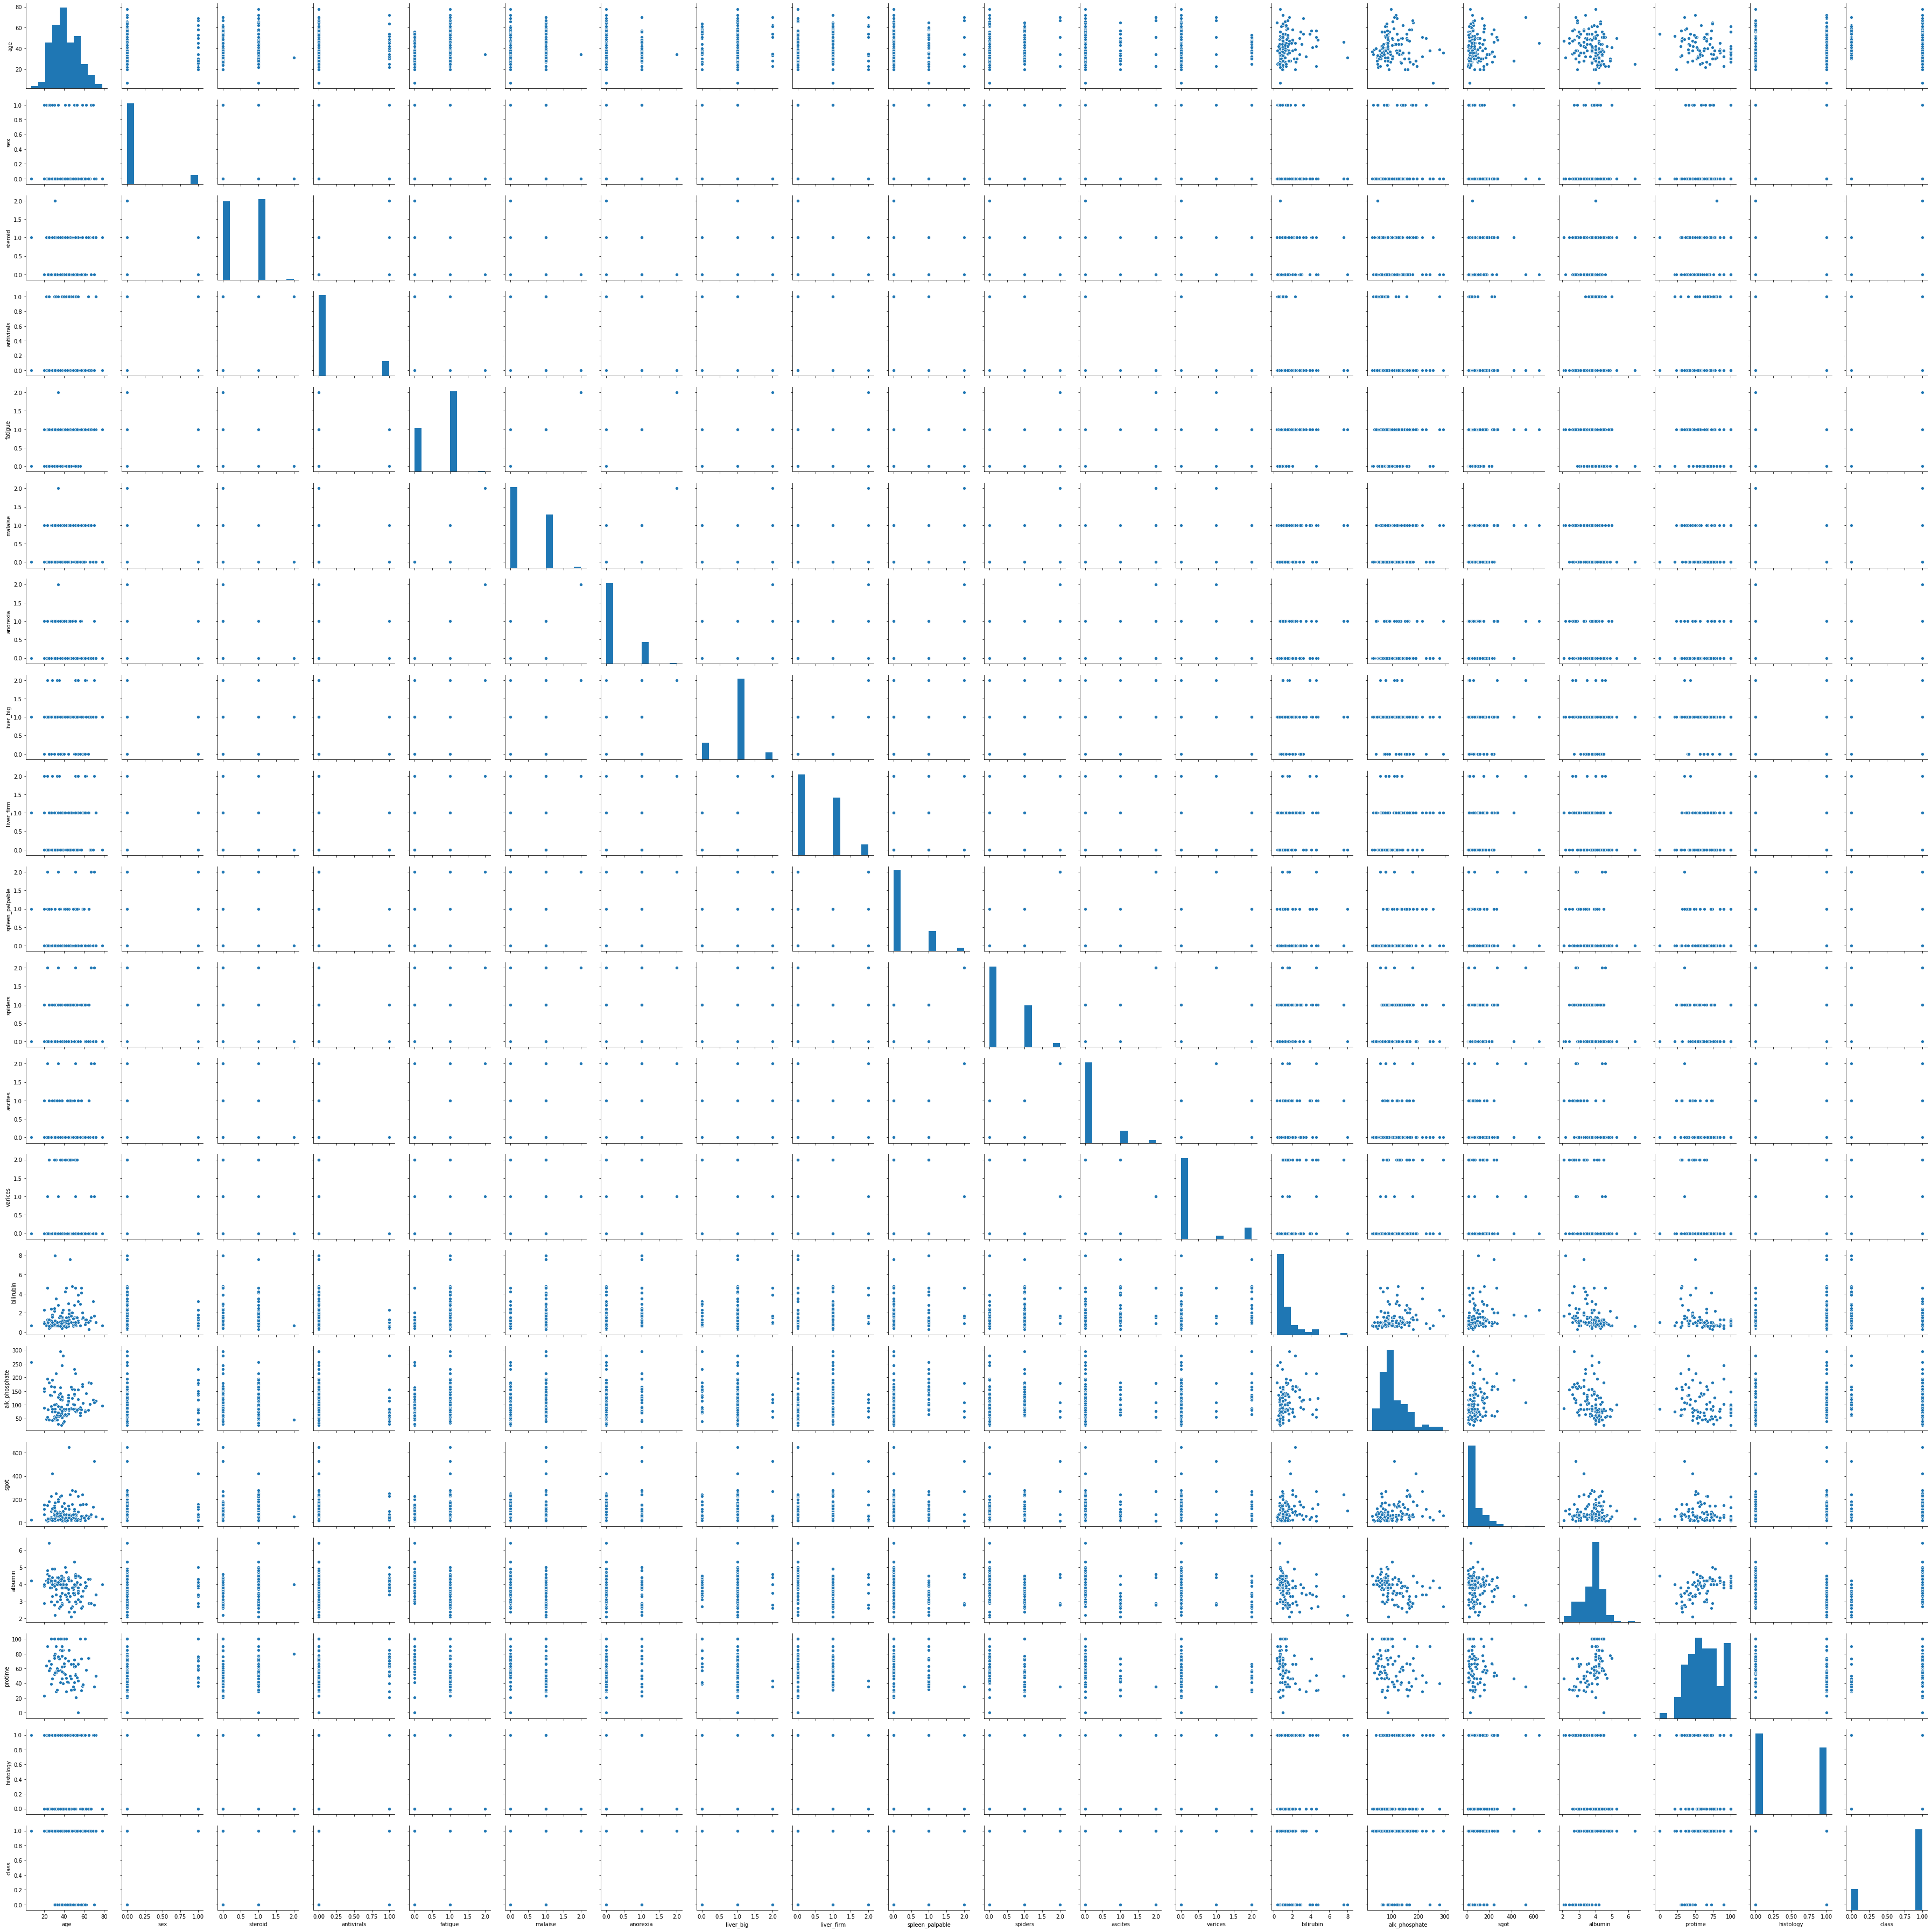

In [38]:
sns.pairplot(dataset)

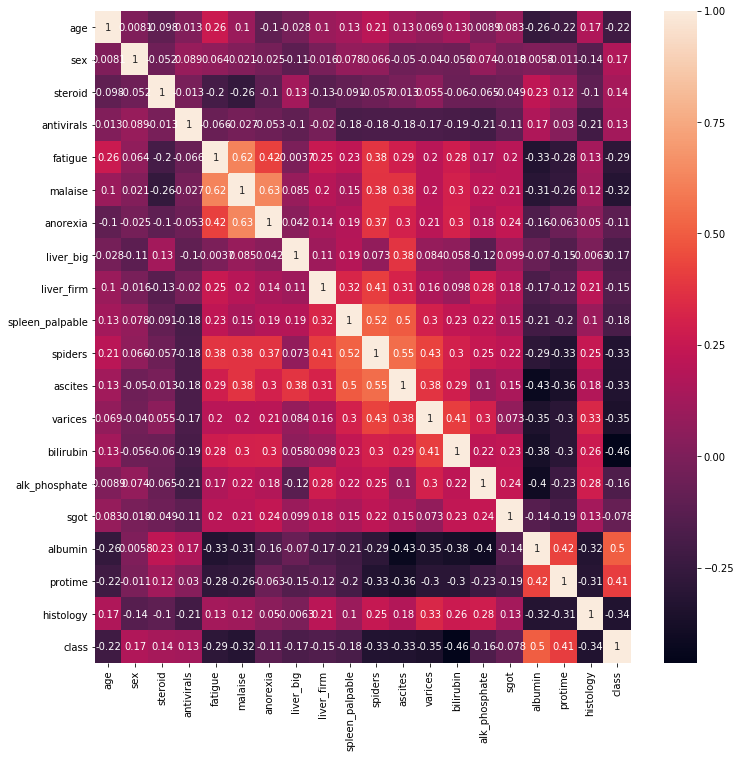

In [39]:
corr_matrix=dataset.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Step7: Fill NaN to Mean value

In [42]:
dataset['bilirubin'].fillna(dataset['bilirubin'].mean(),inplace=True)
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,NaN,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,NaN,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,NaN,0,1
3,31,0,2,1,0,0,0,1,0,0,0,0,0,0.7,46.0,52.0,4.0,80.0,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,NaN,200.0,4.0,NaN,0,1


In [43]:
dataset['alk_phosphate'].fillna(dataset['alk_phosphate'].mean(),inplace=True)
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.000000,18.0,4.0,NaN,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.000000,42.0,3.5,NaN,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.000000,32.0,4.0,NaN,0,1
3,31,0,2,1,0,0,0,1,0,0,0,0,0,0.7,46.000000,52.0,4.0,80.0,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,105.325397,200.0,4.0,NaN,0,1


In [44]:
dataset['protime'].fillna(dataset['protime'].mean(),inplace=True)
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.000000,18.0,4.0,61.852273,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.000000,42.0,3.5,61.852273,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.000000,32.0,4.0,61.852273,0,1
3,31,0,2,1,0,0,0,1,0,0,0,0,0,0.7,46.000000,52.0,4.0,80.000000,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,105.325397,200.0,4.0,61.852273,0,1


In [46]:
dataset['albumin'].fillna(dataset['albumin'].mean(),inplace=True)
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.000000,18.0,4.0,61.852273,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.000000,42.0,3.5,61.852273,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.000000,32.0,4.0,61.852273,0,1
3,31,0,2,1,0,0,0,1,0,0,0,0,0,0.7,46.000000,52.0,4.0,80.000000,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,105.325397,200.0,4.0,61.852273,0,1


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
age                155 non-null int64
sex                155 non-null int32
steroid            155 non-null int32
antivirals         155 non-null int64
fatigue            155 non-null int32
malaise            155 non-null int32
anorexia           155 non-null int32
liver_big          155 non-null int32
liver_firm         155 non-null int32
spleen_palpable    155 non-null int32
spiders            155 non-null int32
ascites            155 non-null int32
varices            155 non-null int32
bilirubin          155 non-null float64
alk_phosphate      155 non-null float64
sgot               151 non-null float64
albumin            155 non-null float64
protime            155 non-null float64
histology          155 non-null int64
class              155 non-null int32
dtypes: float64(5), int32(12), int64(3)
memory usage: 17.0 KB


In [59]:
by_class= dataset.groupby('class')# seprting the class die
h_die=by_class.get_group(0)
h_die

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
6,51,0,0,0,1,0,1,1,0,1,1,0,0,1.427517,105.325397,NaN,3.817266,61.852273,0,0
30,39,0,0,1,1,1,0,1,1,0,0,0,0,2.300000,280.000000,98.0,3.800000,40.000000,0,0
31,62,0,0,0,1,1,0,2,2,0,0,0,0,1.000000,105.325397,60.0,3.817266,61.852273,0,0
35,37,0,1,0,1,0,0,1,0,0,1,0,0,0.600000,67.000000,28.0,4.200000,61.852273,0,0
67,57,0,1,0,1,1,1,1,0,0,1,1,0,4.100000,105.325397,48.0,2.600000,73.000000,0,0
71,34,0,0,0,1,1,0,0,1,0,1,0,0,2.800000,127.000000,182.0,3.817266,61.852273,0,0
76,58,0,1,0,1,0,0,0,1,1,1,0,0,2.000000,167.000000,242.0,3.300000,61.852273,0,0
86,44,0,0,0,1,1,0,1,0,1,0,0,2,0.900000,135.000000,55.0,3.817266,41.000000,1,0
87,30,0,1,0,1,1,1,1,1,0,1,1,2,2.500000,165.000000,64.0,2.800000,61.852273,1,0
88,38,0,0,0,1,1,1,1,1,0,1,1,2,1.200000,118.000000,16.0,2.800000,61.852273,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000194A359D0B8>,
      dtype=object)

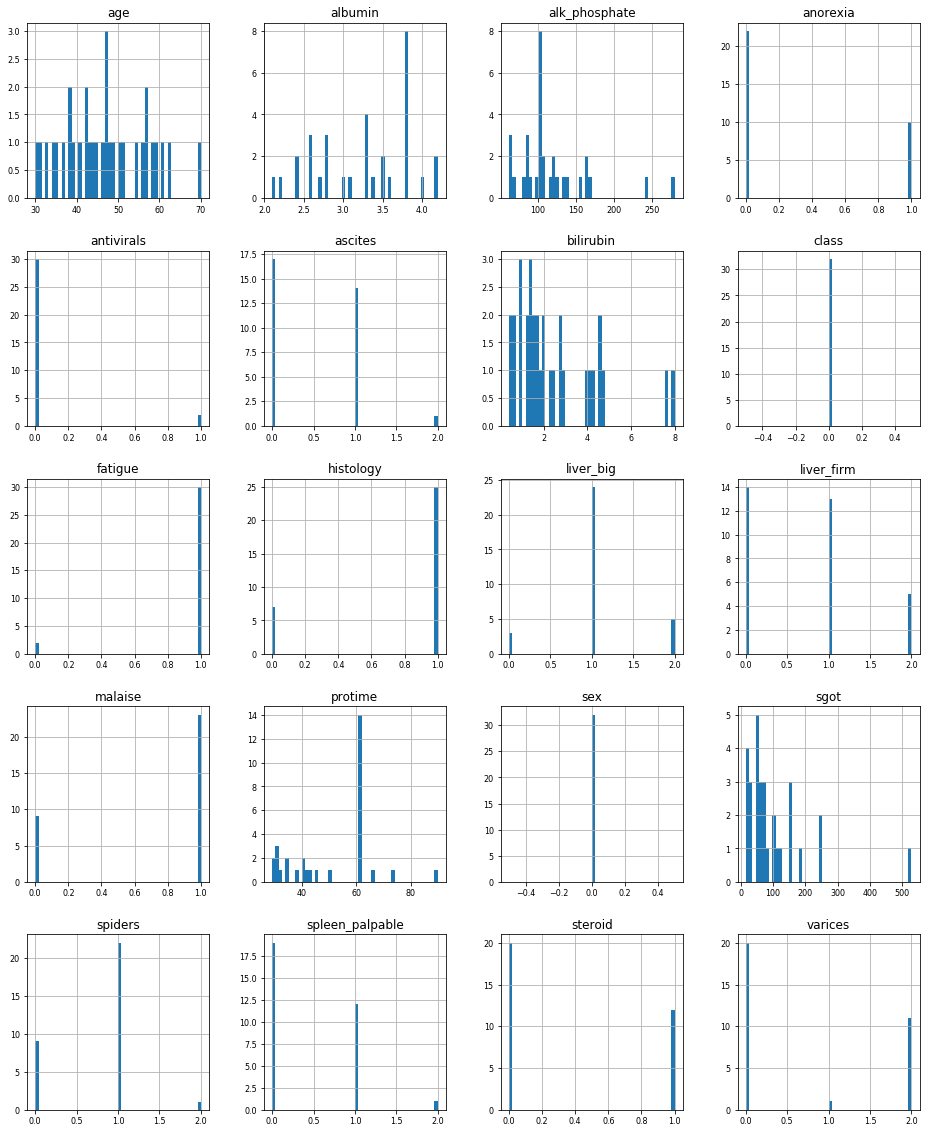

In [60]:
h_die.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8) 

# Step8: Conclusion

In [ ]:
Cases with high albumin and protime have been found to have hepatitits in correlation test